In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir()

['.Rhistory',
 'Music',
 '.condarc',
 '.DS_Store',
 'VirtualBox VMs',
 '.CFUserTextEncoding',
 '要记的东西.ipynb',
 '.subversion',
 'Case Comp Data Final.csv',
 'Creative Cloud Files',
 'Pictures',
 'woe_transform_function short version.ipynb',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 'application_train.csv',
 'coursera week3 assignment.ipynb',
 'home credit risk default_dev.ipynb',
 '.bash_sessions',
 'gcc-4.2',
 'coursera capstone.ipynb',
 'PycharmProjects',
 'Public',
 '.idlerc',
 'home credit  default risk-product.ipynb',
 '.RData',
 '.anaconda',
 'Movies',
 'Applications',
 'datathon by myself.ipynb',
 '.Rapp.history',
 'san-francisco.geojson',
 '.Trash',
 '.zoomus',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.rstudio-desktop',
 '.bash_profile',
 'anaconda3',
 'Downloads',
 'Titanic.ipynb',
 '.gitconfig',
 'coding note1.ipynb',
 'coursera assignment.ipynb',
 '.bash_history',
 'boosting.R',
 '.conda',
 'Titanic_train.csv',
 'datathon notebook2 final.ipynb']

In [3]:
data = pd.read_csv('Case Comp Data Final.csv')

In [4]:
data.shape

(101766, 37)

In [5]:
data_1 = data
data_2 = data.copy()
data_1.shape, data_2.shape

((101766, 37), (101766, 37))

In [6]:
data.head(5)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,sitagliptin,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),3,59,0,18,0,...,No,No,No,Up,No,No,No,No,No,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,...,No,No,No,No,No,No,No,No,No,NO
3,500364,82442376,Caucasian,Male,[30-40),2,44,1,16,0,...,No,No,No,Up,No,No,No,No,No,NO
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,8,0,...,No,No,No,Steady,No,No,No,No,No,NO


In [7]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'sitagliptin', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'readmitted'],
      dtype='object')

In [8]:
data.drop(['sitagliptin','acetohexamide','troglitazone'],axis=1,inplace=True)
data.shape

(101766, 34)

In [9]:
data_1.shape, data_2.shape

((101766, 34), (101766, 37))

In [10]:
del data_1
del data_2

In [12]:
##### .copy() pass on values without linking them in memory

drug_columns = list(data.columns[14:-1])
#drug_columns

sample_series = data[drug_columns].iloc[0]
sample_series

sample_series.index

sample_series.values

sample_series.to_dict()

{'metformin': 'No',
 'repaglinide': 'No',
 'nateglinide': 'No',
 'chlorpropamide': 'No',
 'glimepiride': 'No',
 'glipizide': 'No',
 'glyburide': 'No',
 'tolbutamide': 'No',
 'pioglitazone': 'No',
 'rosiglitazone': 'No',
 'acarbose': 'No',
 'miglitol': 'No',
 'tolazamide': 'No',
 'insulin': 'No',
 'glyburide-metformin': 'No',
 'glipizide-metformin': 'No',
 'glimepiride-pioglitazone': 'No',
 'metformin-rosiglitazone': 'No',
 'metformin-pioglitazone': 'No'}

In [13]:

#### python function

list(sample_series.values).count('No')

data['drug_presicribed'] = (data[drug_columns].apply(lambda x : list(x.values).count('No'),axis = 1) 
                               != 21)

data_temp1 = data[data['drug_presicribed']]


race_dummies = pd.get_dummies(data_temp1.race,prefix = 'race',dummy_na = True)

data_temp1['bloodtested'] = (data_temp1.A1Cresult == 'None')

age_mapper_dict = {i: int(i.split('-')[0][1:])+5 for i in data_temp1.age.value_counts(dropna = False).to_dict().keys()}

data_temp1['age_cleaned'] = data_temp1.age.map(age_mapper_dict)

In [14]:
race_dummies.shape

(101766, 7)

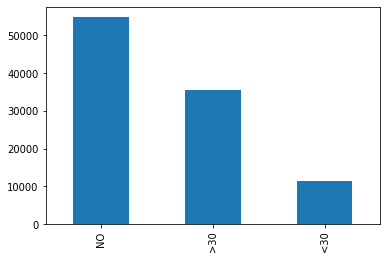

In [15]:
data_temp1.readmitted.value_counts().plot(kind='bar')

### plots

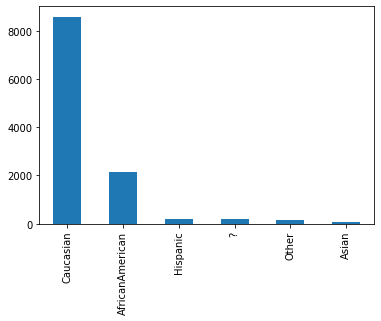

In [16]:
data_temp1.race[data_temp1.readmitted=='<30'].value_counts().plot(kind='bar')


### standardlize num features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
base_line_features = ['time_in_hospital', 'num_lab_procedures', 
                      'num_procedures','num_medications', 'number_outpatient', 
                      'number_emergency','number_inpatient', 'number_diagnoses','gender']

base_line_features += ['bloodtested','age_cleaned']
base_line_features += ['encounter_id']

base_line_X = (data_temp1[base_line_features].merge(race_dummies,left_index = True,right_index = True))
base_line_X['gender'] = base_line_X['gender'] == 'Female'

In [19]:
num_features = ['age_cleaned','time_in_hospital','num_lab_procedures','num_procedures',
              'num_medications','number_outpatient','number_emergency',
              'number_inpatient'   ,'number_diagnoses' ]
scaler.fit(base_line_X[num_features])
new_num_features_values = scaler.transform(base_line_X[num_features])
new_num_features  = pd.DataFrame(new_num_features_values,columns = num_features)

In [20]:
based_line_X_std = base_line_X[[i for i in base_line_X.columns if i not in num_features]].merge(new_num_features,left_index = True,right_index = True)

In [21]:
based_line_X_std


,gender,bloodtested,encounter_id,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,age_cleaned,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,True,True,2278392,0,0,0,1,0,0,0,-3.824600,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.212620,-0.503276,-3.321596
1,True,True,149190,0,0,0,1,0,0,0,-3.197277,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.212620,-0.503276,0.815784
2,True,True,64410,0,1,0,0,0,0,0,-2.569954,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.212620,0.288579,-0.735733
3,False,True,500364,0,0,0,1,0,0,0,-1.942632,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.212620,-0.503276,-0.218561
4,False,True,16680,0,0,0,1,0,0,0,-1.315309,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.212620,-0.503276,-1.252906
5,False,True,35754,0,0,0,1,0,0,0,-0.687986,-0.467653,-0.614795,2.732016,-0.002688,-0.291461,-0.212620,-0.503276,0.815784
6,False,True,55842,0,0,0,1,0,0,0,-0.060664,-0.132655,1.367490,-0.199162,0.612506,-0.291461,-0.212620,-0.503276,-0.218561
7,False,True,63768,0,0,0,1,0,0,0,0.566659,0.202343,1.519973,-0.785398,-0.494842,-0.291461,-0.212620,-0.503276,0.298612
8,True,True,12522,0,0,0,1,0,0,0,1.193982,2.882327,1.265834,0.387074,1.473776,-0.291461,-0.212620,-0.503276,0.298612
9,True,True,15738,0,0,0,1,0,0,0,1.821305,2.547329,-0.513139,0.973309,0.243390,-0.291461,-0.212620,-0.503276,0.298612


In [22]:
base_line_target = data[data.encounter_id.isin(based_line_X_std.encounter_id)][['encounter_id','readmitted']]

### baseline model

In [23]:
from sklearn.linear_model import LogisticRegression


In [225]:
base_line_target['Target'] = (base_line_target.readmitted == '<30').map(int)

In [226]:
base_line_target['Target']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        1
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
101736    0
101737    0
101738    0
101739    0
101740    0
101741    0
101742    0
101743    0
101744    0
101745    0
101746    1
101747    0
101748    0
101749    0
101750    1
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101757    0
101758    0
101759    0
101760    0
101761    0
101762    0
101763    0
101764    0
101765    0
Name: Target, Length: 101766, dtype: int64

In [192]:
X_df = based_line_X_std[based_line_X_std.encounter_id.isin(base_line_target.encounter_id)].sort_values('encounter_id').set_index('encounter_id')
X_values = X_df.values
y_values = base_line_target['Target'].values

In [195]:
base_line_target.sort_values('encounter_id').Target.value_counts()

0    90409
1    11357
Name: Target, dtype: int64

In [196]:
baseline = LogisticRegression(random_state=998,penalty='l1',C=0.03).fit(X_values, y_values)
baseline.coef_

array([[-0.01001387,  0.04594975,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.06193536,
         0.06670322,  0.00323219, -0.04693321,  0.05715551,  0.        ,
         0.03217929,  0.33802053,  0.08030739]])

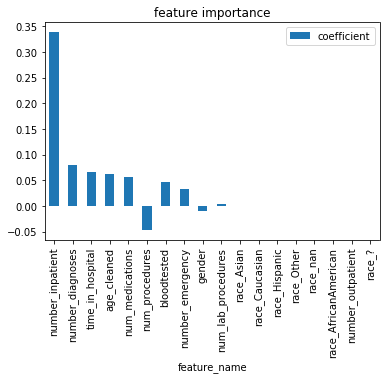

In [218]:
baseline_model_feature_importance = pd.DataFrame({'coefficient': baseline.coef_[0],'feature_name':X_df.columns})
baseline_model_feature_importance['abs_coef'] = baseline_model_feature_importance.coefficient.abs()
baseline_model_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].set_index('feature_name').plot(kind='bar',title='feature importance')


In [150]:
base_line_vars = baseline_model_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].iloc[:10].feature_name.values
base_line_vars

array(['number_inpatient', 'number_diagnoses', 'time_in_hospital',
       'age_cleaned', 'num_medications', 'num_procedures', 'bloodtested',
       'number_emergency', 'gender', 'num_lab_procedures'], dtype=object)

In [198]:
data[drug_columns].metformin.value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

###  study of metaformin

In [199]:
metaformin_dummies = pd.get_dummies(data['metformin'])

In [200]:
metaformin_dummies['encounter_id'] = data.encounter_id
metaformin_dummies.set_index('encounter_id',inplace = True)

In [232]:
metaformin_dummies

,Down,No,Steady,Up
encounter_id,,,,
2278392,0,1,0,0
149190,0,1,0,0
64410,0,1,0,0
500364,0,1,0,0
16680,0,1,0,0
35754,0,1,0,0
55842,0,0,1,0
63768,0,1,0,0
12522,0,1,0,0


In [201]:
X_df.shape,metaformin_dummies.shape

((101766, 18), (101766, 4))

In [202]:

X_metaformin = X_df[base_line_vars].merge(metaformin_dummies,left_index = True,right_index = True,how = 'left')
X_metaformin.shape

(101766, 14)

In [203]:
X_metaformin.columns

Index(['number_inpatient', 'number_diagnoses', 'time_in_hospital',
       'age_cleaned', 'num_medications', 'num_procedures', 'bloodtested',
       'number_emergency', 'gender', 'num_lab_procedures', 'Down', 'No',
       'Steady', 'Up'],
      dtype='object')

In [204]:
metaformin_lr = LogisticRegression(random_state=998).fit(X_metaformin, y_values)

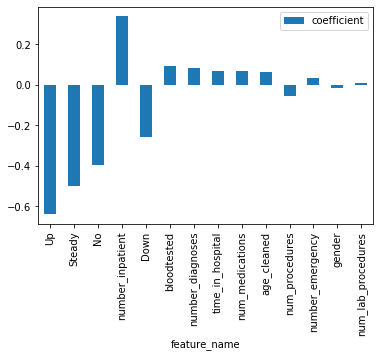

In [205]:
metaformin_lr_feature_importance = pd.DataFrame({'coefficient': metaformin_lr.coef_[0],'feature_name':X_metaformin.columns})

metaformin_lr_feature_importance['abs_coef'] = metaformin_lr_feature_importance.coefficient.abs()

metaformin_lr_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].set_index('feature_name').plot(kind='bar')

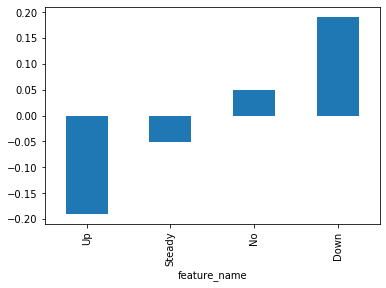

In [206]:
table1 = metaformin_lr_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].set_index('feature_name').loc[['Up','Steady','No','Down'],:]
table1['coef_balanced'] = table1.coefficient - table1.coefficient.mean()
table1.coef_balanced.plot(kind='bar')

In [207]:
import numpy as np
def logit2prob (logit):
    odds = np.exp(logit)
    prob = odds / (1 + odds)
    return(prob)

#### understanding the actual meaning of probability
#### how to get probability from doefficient

In [208]:
p1 =0.5

In [209]:
patient_up = 1*logit2prob(-0.3)+0*logit2prob(-0.15)+0*logit2prob(0.10)+0*logit2prob(0.20)+ p1
patient_down = 0*logit2prob(-0.3)+0*logit2prob(-0.15)+0*logit2prob(0.10)+1*logit2prob(0.20)+ p1
patient_up-patient_down

-0.12427651412413687

In [227]:
def get_drug_analytics(drug_name):
    print ('__________________________________'+len(i)*'_')
    print ('_________________',drug_name,'_______________')
    print ('__________________________________'+len(i)*'_')
    
    # test case 1, study the four ways to using a frug
    drug_dummies = pd.get_dummies(data[drug_name])
    dummies_col = list(drug_dummies.columns)
    drug_dummies['encounter_id'] = data.encounter_id
    drug_dummies.set_index('encounter_id',inplace = True)
    drug_data = X_df[base_line_vars].merge(drug_dummies,left_index = True,right_index = True,how = 'left')
    y_values = base_line_target['Target'].values
    drug_lr = LogisticRegression(random_state=998).fit(drug_data.values, y_values)
    drug_lr_feature_importance = pd.DataFrame({'coefficient': drug_lr.coef_[0],'feature_name':list(base_line_vars)+ dummies_col})
    drug_lr_feature_importance['abs_coef'] = drug_lr_feature_importance.coefficient.abs()
    table1 = drug_lr_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].set_index('feature_name').loc[['Up','Steady','No','Down'],:]
    table1['coef_balanced'] = table1.coefficient - table1.coefficient.mean()
    table1.coef_balanced.plot(kind='bar',title = 'detail test')
    plt.show()
    # simplify the study. only take two senerios, Increase/steady or decrease/No
    drug_dummies2 = pd.get_dummies(data[drug_name].map({'Up':'+','Steady':'+','No':'-','Down':'-'}))
    drug_dummies2['encounter_id'] = data.encounter_id
    drug_dummies2.set_index('encounter_id',inplace = True)
    drug_data2 = X_df[base_line_vars].merge(drug_dummies2,left_index = True,right_index = True,how = 'left')
    drug_lr2 = LogisticRegression(random_state=998).fit(drug_data2.values, y_values)
    drug_lr2_feature_importance = pd.DataFrame({'coefficient': drug_lr2.coef_[0],'feature_name':list(base_line_vars)+['+', '-']})
    drug_lr2_feature_importance['abs_coef'] = drug_lr2_feature_importance.coefficient.abs()
    table2 = drug_lr2_feature_importance.sort_values('abs_coef',ascending=False)[['coefficient','feature_name']].set_index('feature_name').loc[['-','+'],:]
    table2.coefficient.plot(kind='bar',title = 'simple test')
    plt.show()
    return (logit2prob(table2.loc['-','coefficient'])-logit2prob(table2.loc['+','coefficient']))

________________________________________________________
_________________ rosiglitazone _______________
________________________________________________________


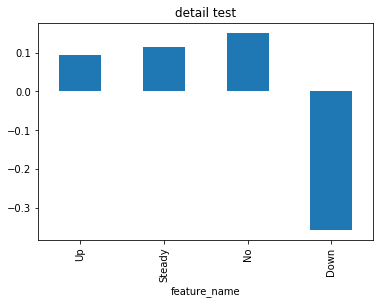

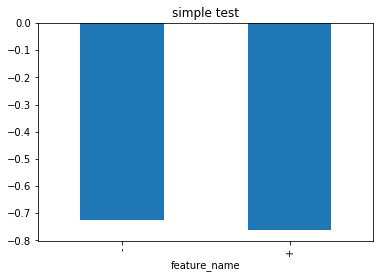

0.008151721381196186

In [228]:
get_drug_analytics('rosiglitazone')


In [212]:
drug_columns = data.columns[14:-2]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

___________________________________________
_________________ metformin _______________
___________________________________________


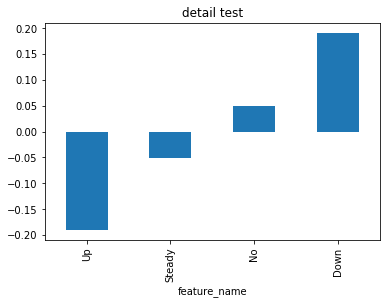

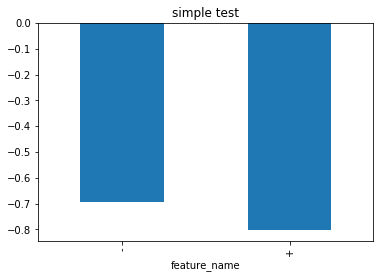

0.023851
_____________________________________________
_________________ repaglinide _______________
_____________________________________________


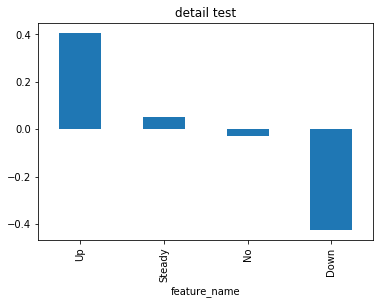

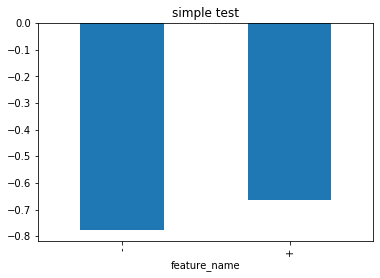

-0.025074
_____________________________________________
_________________ nateglinide _______________
_____________________________________________


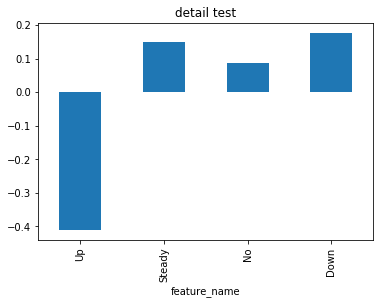

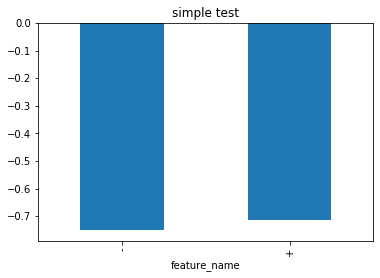

-0.008465
________________________________________________
_________________ chlorpropamide _______________
________________________________________________


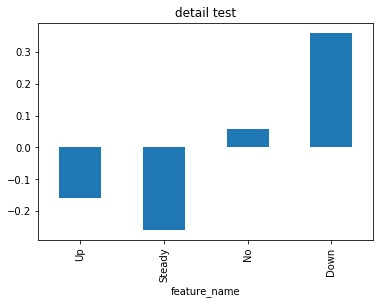

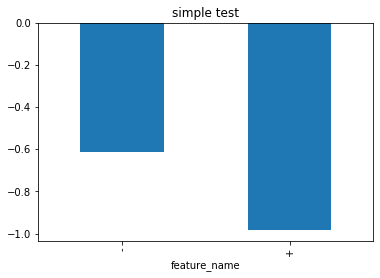

0.078893
_____________________________________________
_________________ glimepiride _______________
_____________________________________________


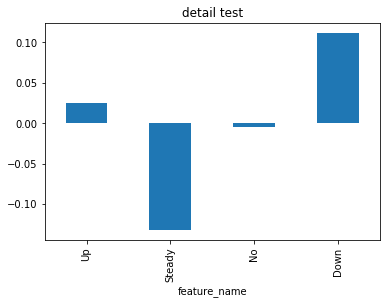

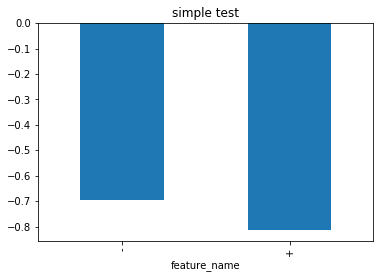

0.02555
___________________________________________
_________________ glipizide _______________
___________________________________________


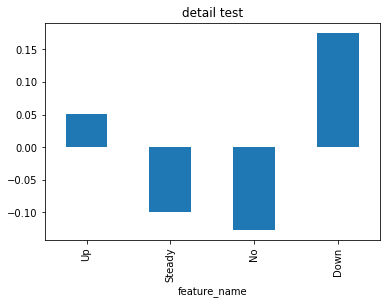

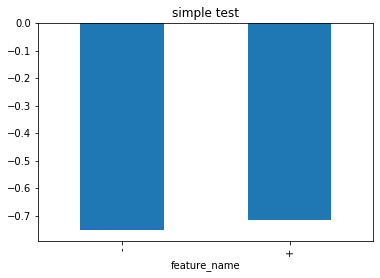

-0.008086
___________________________________________
_________________ glyburide _______________
___________________________________________


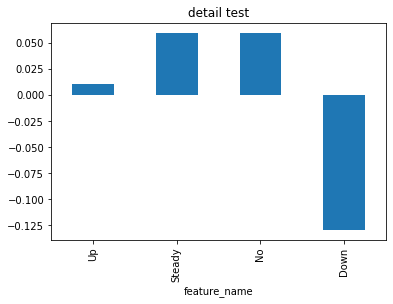

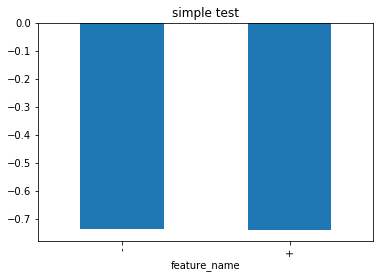

0.000654
_____________________________________________
_________________ tolbutamide _______________
_____________________________________________


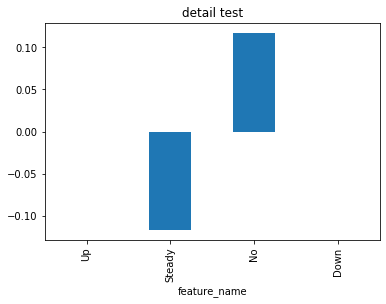

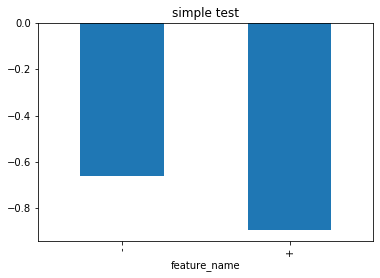

0.050643
______________________________________________
_________________ pioglitazone _______________
______________________________________________


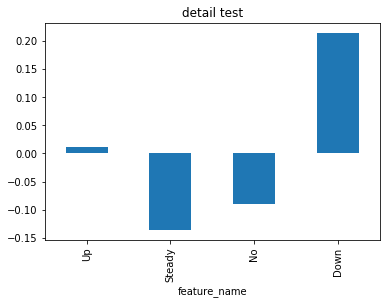

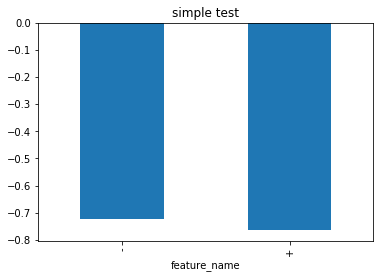

0.009084
_______________________________________________
_________________ rosiglitazone _______________
_______________________________________________


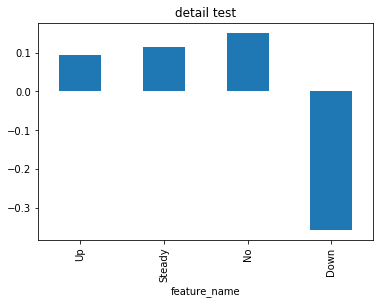

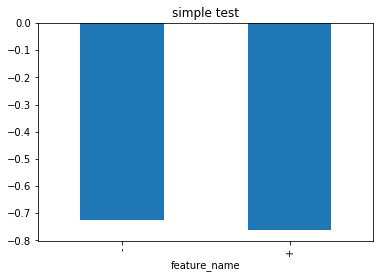

0.008152
__________________________________________
_________________ acarbose _______________
__________________________________________


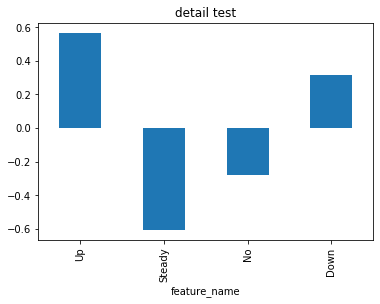

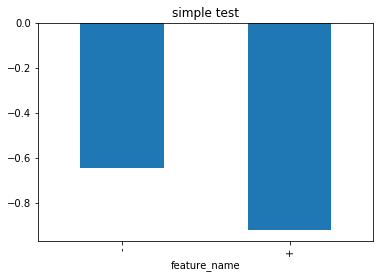

0.059869
__________________________________________
_________________ miglitol _______________
__________________________________________


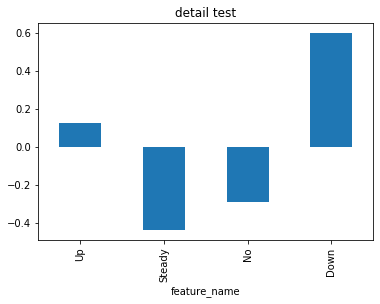

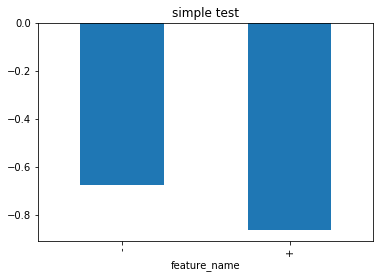

0.040506
____________________________________________
_________________ tolazamide _______________
____________________________________________


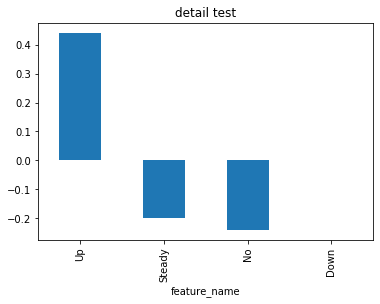

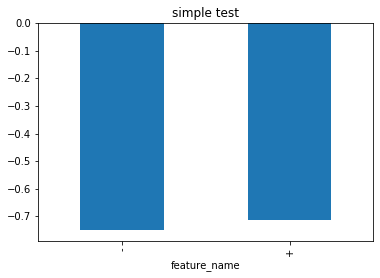

-0.007967
_________________________________________
_________________ insulin _______________
_________________________________________


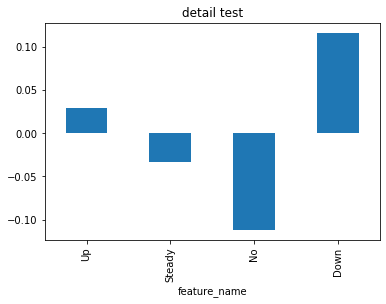

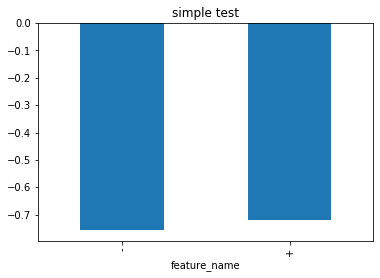

-0.008184
_____________________________________________________
_________________ glyburide-metformin _______________
_____________________________________________________


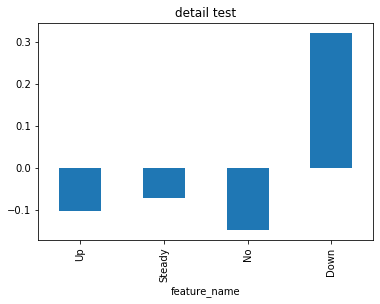

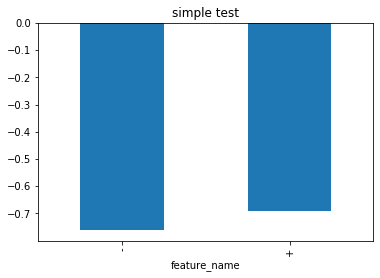

-0.015204
_____________________________________________________
_________________ glipizide-metformin _______________
_____________________________________________________


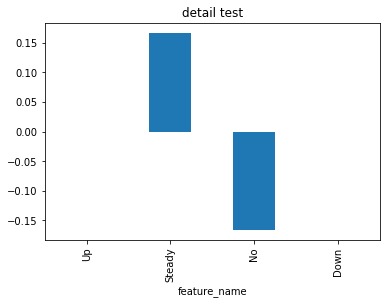

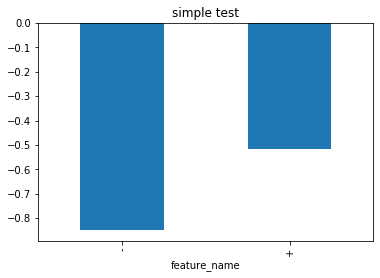

-0.074234
__________________________________________________________
_________________ glimepiride-pioglitazone _______________
__________________________________________________________


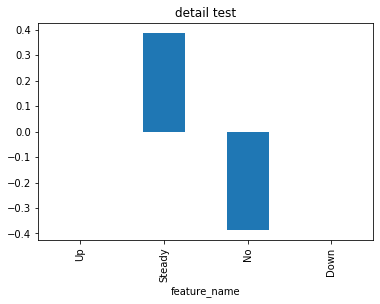

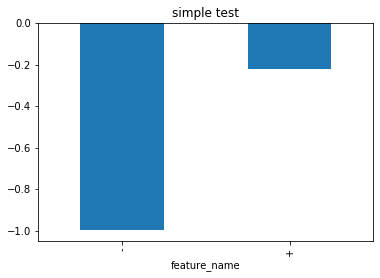

-0.175421
_________________________________________________________
_________________ metformin-rosiglitazone _______________
_________________________________________________________


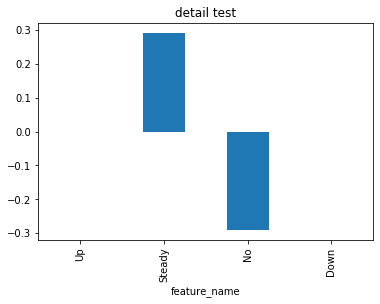

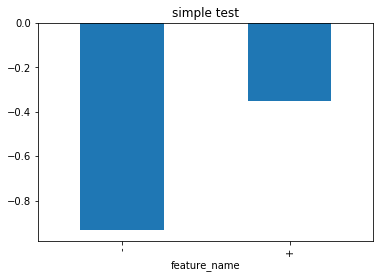

-0.131282
________________________________________________________
_________________ metformin-pioglitazone _______________
________________________________________________________


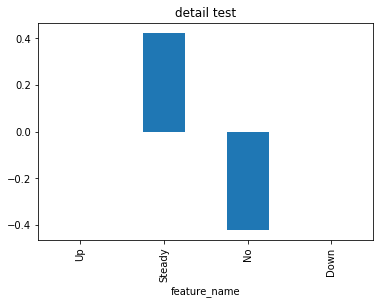

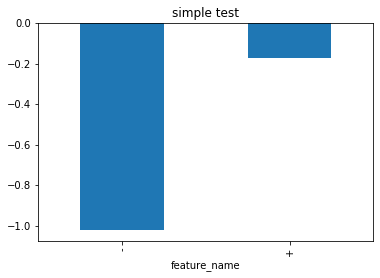

-0.19212


In [229]:
saved_result = []
for i in drug_columns:
    temp = get_drug_analytics(i)
    print(round(temp,6))
    saved_result.append(temp)
result = pd.DataFrame({'drug_name':drug_columns,'strength':saved_result})


In [214]:
drug_columns

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')

In [230]:
drug_class = ['Biguanide','Meglitinides','Meglitinides','sulfonylurea (1st generation)','sulfonylurea (3rd generation)','sulfonylurea (2nd generation)','sulfonylurea (2nd generation)','sulfonylurea (1st generation)','Glitazones','Glitazones','Alpha- glucosidase inhibitors','Alpha- glucosidase inhibitors','sulfonylurea (1st generation)','Insulin','mixed','mixed','mixed','mixed','mixed']
drug_rank = pd.DataFrame({'drug':drug_columns,'strength': saved_result})
drug_rank = drug_rank.sort_values('strength',ascending = False)
drug_rank['drug_class'] = drug_class
drug_rank

,drug,strength,drug_class
3,chlorpropamide,0.078893,Biguanide
10,acarbose,0.059869,Meglitinides
7,tolbutamide,0.050643,Meglitinides
11,miglitol,0.040506,sulfonylurea (1st generation)
4,glimepiride,0.025550,sulfonylurea (3rd generation)
0,metformin,0.023851,sulfonylurea (2nd generation)
8,pioglitazone,0.009084,sulfonylurea (2nd generation)
9,rosiglitazone,0.008152,sulfonylurea (1st generation)
6,glyburide,0.000654,Glitazones
12,tolazamide,-0.007967,Glitazones


________________________________________________________
_________________ chlorpropamide _______________
________________________________________________________


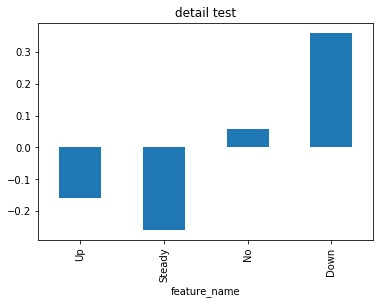

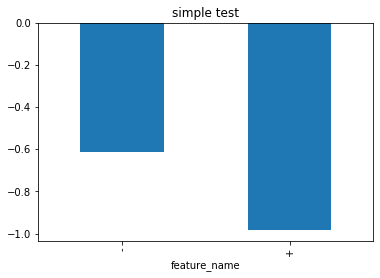

0.07889268996406212

In [231]:
get_drug_analytics('chlorpropamide')

In [ ]:
result.sort_values('strength',ascending=False)

In [ ]:
a=result.sort_values('strength',ascending=False)

In [ ]:
drug_strength=a.to_csv(r'/Users/apple/Desktop/drug_strength.csv')

In [ ]:
#